<a href="https://colab.research.google.com/github/CO16348Sahil/automatic-watermark-detection/blob/master/MalariaaRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate, accuracy

In [0]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
PATH= Path('/content/drive/My Drive/Colab Notebooks/cell_images')
PATH.ls()

[PosixPath('/content/drive/My Drive/Colab Notebooks/cell_images/Parasitized'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/cell_images/Parasitized.tar.gz'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/cell_images/Uninfected.tar.gz'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/cell_images/Uninfected'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/cell_images/models'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/cell_images/export.pkl')]

In [0]:
# !tar -xvf '/content/drive/My Drive/Colab Notebooks/cell_images/Parasitized.tar.gz' -C '/content/drive/My Drive/Colab Notebooks/cell_images'

In [0]:
# !tar -xvf '/content/drive/My Drive/Colab Notebooks/cell_images/Uninfected.tar.gz' -C '/content/drive/My Drive/Colab Notebooks/cell_images'

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(PATH, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['Parasitized', 'Uninfected']

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Parasitized', 'Uninfected'], 2, 20188, 5047)

In [0]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:04<00:00, 19.9MB/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.263961,0.155833,0.947692,12:42
1,0.168951,0.127504,0.956014,04:31
2,0.155010,0.108807,0.962156,04:36
3,0.139855,0.105125,0.961958,04:36


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


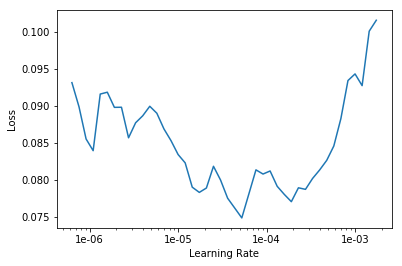

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.127603,0.100509,0.968298,04:49
1,0.103188,0.082781,0.971072,04:49


In [0]:
learn.save('stage-2')

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.119126,0.086441,0.969289,04:45
1,0.095615,0.077893,0.970676,04:47


In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

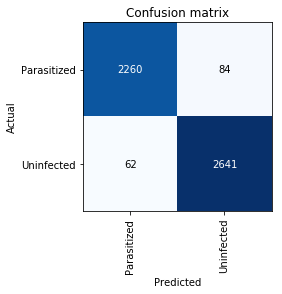

In [0]:
interp.plot_confusion_matrix()

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

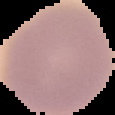

In [35]:
img = open_image(PATH/'Uninfected/C1_thinF_IMG_20150604_104722_cell_9.png')
img

In [36]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Uninfected

In [0]:
learn = load_learner(PATH)